## Mean reversion and jump diffusion modelling

Mean reversion is a financial term for the assumption that an asset's price will tend to converge to the average price over time. Jump diffusion is a stochastic process that involves jumps and diffusion. It is a type of Lévy process. It has important applications in magnetic reconnection, coronal mass ejections, condensed matter physics, and pattern theory and computational vision. A jump-diffusion model is a form of mixture model, mixing a jump process and a diffusion process. In finance, jump-diffusion models were first introduced by Robert C. Merton. Such models have a range of financial applications from option pricing, to credit risk, energy pricing, to time series forecasting.

### Stochastical differential equation

A Stochastic Differential Equation (SDE) for mean reversion with jump diffusion combines drift, diffusion, and jumps, often seen in financial markets for modeling asset prices like electricity, incorporating a tendency to revert to a long-term mean (drift), continuous random fluctuations (diffusion via Brownian motion), and sudden, large price changes (jumps via a Poisson process). A general form looks like 

$dS=\alpha (\mu -S)dt+\sigma \,dW_{t}+J\,dq_{t}\,$

where $\alpha$ is mean-reversion speed, $\mu$ is the mean, $\sigma$ is volatility, $dW_{t}$ is Brownian motion, $dq_{t}$ is a Poisson process, and $J$ represents the jump size, normally distributed with mean μ_J and std σ_J. 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
from datetime import datetime

In [29]:
class MeanRevertingJumpDiffusionSimulator:
   
    def __init__(self, alpha, mu, sigma, lambda_jump, mu_jump, sigma_jump):
        self.alpha = alpha  # Mean reversion speed
        self.mu = mu  # Long-term mean
        self.sigma = sigma  # Diffusion volatility
        self.lambda_jump = lambda_jump  # Jump intensity
        self.mu_jump = mu_jump  # Mean jump size
        self.sigma_jump = sigma_jump  # Jump size volatility
    
    def simulate(self, X0, T, dt, n_paths=1):
        
        # Simulate paths using Euler-Maruyama method
        
        # Parameters:
        # - X0: initial value
        # - T: time horizon
        # - dt: time step
        # - n_paths: number of simulation paths
        
        # Returns:
        # - t: time grid
        # - X: simulated paths (n_paths x n_steps)
        
        n_steps = int(T / dt)
        t = np.linspace(0, T, n_steps + 1)
        X = np.zeros((n_paths, n_steps + 1))
        X[:, 0] = X0
        
        for i in range(n_steps):
            # Brownian motion increment
            dW = np.random.normal(0, np.sqrt(dt), n_paths)
            
            # Poisson jumps
            n_jumps = np.random.poisson(self.lambda_jump * dt, n_paths)
            jump_sizes = np.array([
                np.sum(np.random.normal(self.mu_jump, self.sigma_jump, n))
                if n > 0 else 0 for n in n_jumps
            ])
            
            # Update process
            drift = self.alpha * (self.mu - X[:, i]) * dt
            diffusion = self.sigma * dW
            X[:, i + 1] = X[:, i] + drift + diffusion + jump_sizes
        
        return t, X

    def exact_simulation(self, X0, T, dt, n_paths=1):
        # Exact simulation using closed-form solution for Ornstein-Uhlenbeck
        # with jumps added
        n_steps = int(T / dt)
        t = np.linspace(0, T, n_steps + 1)
        X = np.zeros((n_paths, n_steps + 1))
        X[:, 0] = X0

        for i in range(n_steps):
            # Exact OU solution
            exp_alpha_dt = np.exp(-self.alpha * dt)
            mean = X[:, i] * exp_alpha_dt + self.mu * (1 - exp_alpha_dt)
            std = self.sigma * np.sqrt((1 - np.exp(-2 * self.alpha * dt)) / (2 * self.alpha))

            X[:, i + 1] = np.random.normal(mean, std)

            # Add jumps
            n_jumps = np.random.poisson(self.lambda_jump * dt, n_paths)
            jump_sizes = np.array([
                np.sum(np.random.normal(self.mu_jump, self.sigma_jump, n))
                if n > 0 else 0 for n in n_jumps
            ])
            X[:, i + 1] += jump_sizes

        return t, X

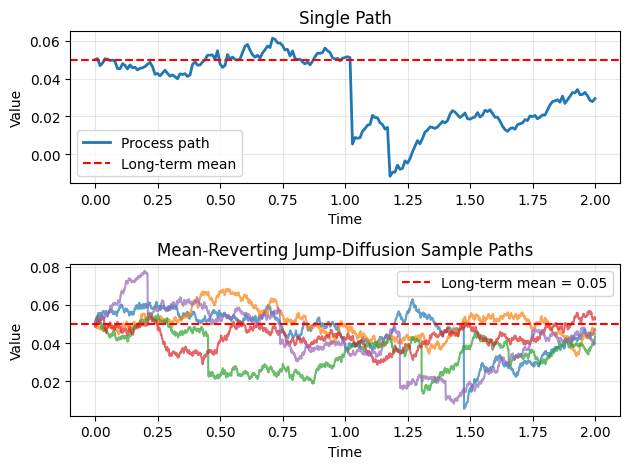

In [39]:
# Set random seed for reproducibility
np.random.seed(17)

# Model parameters
alpha = 2.0      # Mean reversion speed
mu = 0.05     # Long-term mean (e.g., 5% interest rate)
sigma = 0.02     # Diffusion volatility
lambda_jump = 1  # Average 1 jumps per year
mu_jump = -0.01  # Average jump size (negative for drops)
sigma_jump = 0.02  # Jump size volatility

# Simulation parameters
X0 = 0.05        # Initial value
T = 2.0          # Time horizon (years)
dt = 0.001       # Time step

# Create model
model = MeanRevertingJumpDiffusionSimulator(alpha, mu, sigma, lambda_jump, mu_jump, sigma_jump)

# Plotting
fig, axes = plt.subplots(2, 1)

# Plot 0: One path with jump identification
ax0 = axes[0]
n_paths = 1
t_single, X_single = model.simulate(X0, T, 0.01, n_paths)
# t_single, X_single = model.exact_simulation(X0, T, 0.01, n_paths)

ax0.plot(t_single, X_single[0, :], linewidth=2, label='Process path')

# Identify jumps (simple threshold method)
dX = np.diff(X_single[0, :])
# threshold = 3 * sigma * np.sqrt(0.01)
# jump_indices = np.where(np.abs(dX) > threshold)[0]
# ax0.scatter(t_single[jump_indices], X_single[0, jump_indices],
#             color='red', s=50, zorder=5, label='Detected jumps')
ax0.axhline(y=mu, color='r', linestyle='--', label='Long-term mean')
ax0.set_xlabel('Time')
ax0.set_ylabel('Value')
ax0.set_title('Single Path')
ax0.legend()
ax0.grid(True, alpha=0.3)

# Plot 1: Sample paths
ax1 = axes[1]
# Simulate paths
n_paths = 5
t, X = model.simulate(X0, T, dt, n_paths)
# t, X = model.exact_simulation(X0, T, dt, n_paths)

for i in range(n_paths):
    ax1.plot(t, X[i, :], alpha=0.7, linewidth=1.5)
ax1.axhline(y=mu, color='r', linestyle='--', label=f'Long-term mean = {mu}')
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.set_title('Mean-Reverting Jump-Diffusion Sample Paths')
ax1.legend()
ax1.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()


### Summary

We use a stochastical process model to simulate "mean reversion and jump diffusion". The result shows the tread of mean reversion.